Dataset size: 5 samples
Available columns: ['audio', 'slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']

Sample metadata:
  audio: (audio data dictionary)
  slice_file_name: 100263-2-0-126.wav
  fsID: 100263
  start: 63.0
  end: 67.0
  salience: 1
  fold: 5
  classID: 2
  class: children_playing
audio_data {'path': '100263-2-0-126.wav', 'array': array([ 2.59399414e-04,  1.52587891e-05, -2.13623047e-04, ...,
        3.05175781e-04,  4.73022461e-04, -9.46044922e-04]), 'sampling_rate': 44100}

Audio information:
  Path: 100263-2-0-126.wav
  Sample rate: 44100 Hz
  Waveform shape: torch.Size([1, 176400])
  Duration: 4.00 seconds


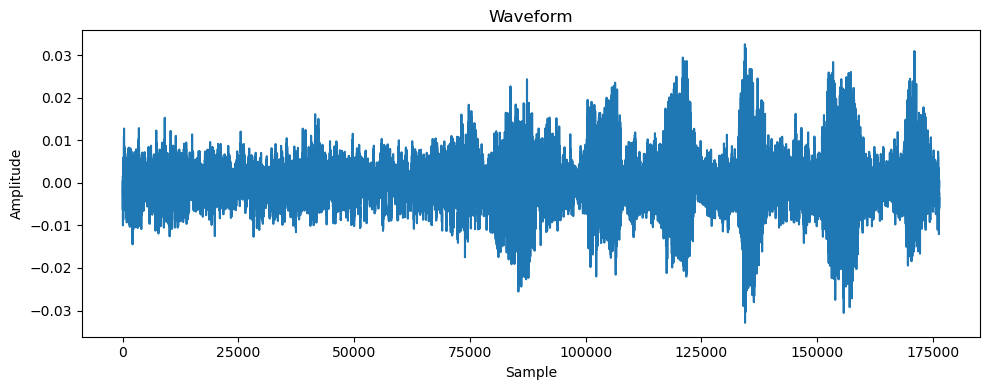

In [7]:
# Import necessary libraries
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load just a small subset of the dataset
dataset = load_dataset("danavery/urbansound8K", split="train[:5]")

# Print basic info
print(f"Dataset size: {len(dataset)} samples")
print(f"Available columns: {dataset.column_names}")

# Look at one sample
sample = dataset[3]
print("\nSample metadata:")
for key, value in sample.items():
    if key != 'audio':
        print(f"  {key}: {value}")
    else:
        print(f"  {key}: (audio data dictionary)")

# Access the audio data directly from the dictionary
audio_data = sample['audio']
print("audio_data", audio_data)
print("\nAudio information:")
print(f"  Path: {audio_data['path']}")
print(f"  Sample rate: {audio_data['sampling_rate']} Hz")

# Convert the audio array to a tensor for consistency
waveform = torch.tensor(audio_data['array']).unsqueeze(0)  # Add channel dimension
print(f"  Waveform shape: {waveform.shape}")
print(f"  Duration: {waveform.shape[1]/audio_data['sampling_rate']:.2f} seconds")

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform[0].numpy())
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()